# Maximal Lyapunov Exponents (MLE)

https://en.wikipedia.org/wiki/Lyapunov_exponent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = 'AMD'

In [3]:
df = yf.download(symbol)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-31,60.750000,61.860001,59.529999,60.060001,60.060001,73274100
2022-11-01,61.490002,61.990002,59.430000,59.660000,59.660000,83806700
2022-11-02,63.000000,63.930000,58.570000,58.630001,58.630001,142669400
2022-11-03,58.110001,62.279999,58.029999,60.110001,60.110001,95279900
2022-11-04,62.500000,63.000000,60.540001,62.369999,62.369999,22980772


In [6]:
df['Returns'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200,-0.036424
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200,0.003437
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600,-0.010274
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800,-0.031142
1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800,-0.085714


In [7]:
R = df['Returns']
LE = []
result = []

for r in R:
  x = np.random.random()
  for n in range(100):
    x = r*x*(1-x)
  result = []

  for n in range(100):
    x = r * x * (1-x)
    result.append(np.log(abs(r-2*r*x)))
  LE.append(np.mean(result))

In [8]:
LE

[-3.3125344178540463,
 -5.673292750059037,
 -4.5781416181124195,
 -3.4692022163733656,
 -2.4567358818126483,
 -3.7534180944607916,
 -2.8134108388303423,
 -3.513671135306356,
 -2.656754999367844,
 -inf,
 -2.552732583580599,
 -3.174261417672101,
 -5.529398570398927,
 -3.3361650320141325,
 -3.8877365414653924,
 -3.571538387764879,
 -3.5992761339795782,
 -3.269574926681546,
 -3.587475100650522,
 -inf,
 -2.5096007882584423,
 -3.474633704596543,
 -3.1484593331291664,
 -4.308559619642127,
 -2.1355323208008277,
 -3.89589972703252,
 -2.7528621879612043,
 -3.64133414970042,
 -4.867503815967799,
 -3.776585151012339,
 -3.1472767422553,
 -3.304033508646959,
 -5.463801158601329,
 -2.9031084361703408,
 -3.442023312957258,
 -inf,
 -3.473521857946321,
 -3.7297015707044965,
 -3.551266920655971,
 -3.5795383088479706,
 -3.473521857946321,
 -4.197217091839546,
 -3.776585151012339,
 -4.852045642034392,
 -3.761200115693561,
 -4.477336814478198,
 -3.022296953435458,
 -3.6888882824513307,
 -4.966304411754166,


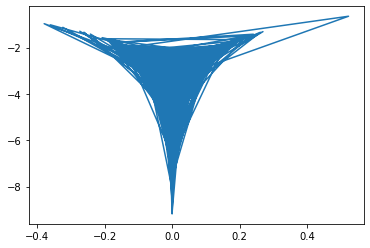

In [9]:
plt.plot(R, LE)
plt.show()

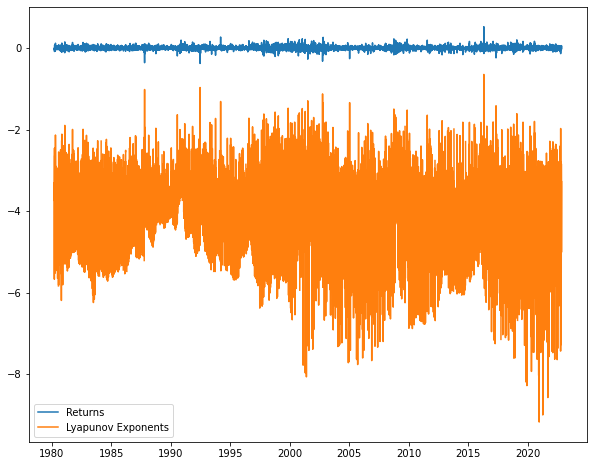

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df.index, df['Returns'], label = 'Returns')
plt.plot(df.index, LE, label = 'Lyapunov Exponents')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Lyapunov Exponents')

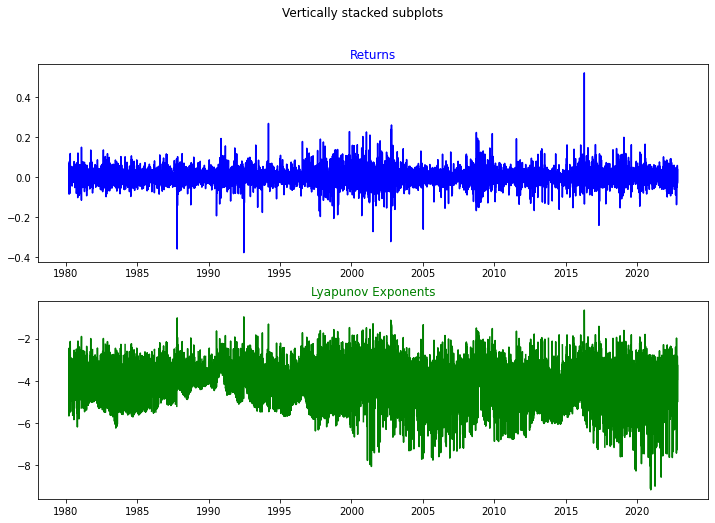

In [11]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12, 8)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df.index, df['Returns'], c='b')
axs[0].set_title('Returns', c='b')
axs[1].plot(df.index, LE, c='g')
axs[1].set_title('Lyapunov Exponents', c='g')